In [2]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import sys
!{sys.executable} -m pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.5/11.1 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.1 MB 1.0 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.1 MB 1.0 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.1 MB 986.4 kB/s eta 0:00:10
   ----- ---------------------------------- 1.6/11.1 MB 1.0 MB/s eta 0:00:10
   ------ --------------------------------- 1.8/11.1 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.1 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.1 MB 1.1 MB/s eta 0:00:09
   --------- ------------------------------ 2.6/11.1 MB 1.1 MB/s eta 0:00:08
   --------- -----


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\manas\tf-env\Scripts\python.exe -m pip install --upgrade pip


In [6]:
import sys
!{sys.executable} -m pip install matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\manas\tf-env\Scripts\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.6 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.7 MB/s eta 0:00:04
   ---------------- ----------------------- 3.4/8.1 MB 1.6 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 1.7 MB/s eta 0:00:03
   ---------------------- ------

Matplotlib is building the font cache; this may take a moment.


Found 3071 images belonging to 4 classes.
Found 766 images belonging to 4 classes.
Epoch 1/10
96/96 [==============================] - 120s 1s/step - loss: 1.3441 - accuracy: 0.5399 - val_loss: 1.0972 - val_accuracy: 0.5418
Epoch 2/10
96/96 [==============================] - 96s 997ms/step - loss: 0.8459 - accuracy: 0.6636 - val_loss: 0.9460 - val_accuracy: 0.5836
Epoch 3/10
96/96 [==============================] - 95s 984ms/step - loss: 0.6838 - accuracy: 0.7415 - val_loss: 1.0350 - val_accuracy: 0.5679
Epoch 4/10
96/96 [==============================] - 95s 987ms/step - loss: 0.5078 - accuracy: 0.8190 - val_loss: 1.0995 - val_accuracy: 0.5992
Epoch 5/10
96/96 [==============================] - 100s 1s/step - loss: 0.3643 - accuracy: 0.8697 - val_loss: 1.3428 - val_accuracy: 0.5692
Epoch 6/10
96/96 [==============================] - 95s 990ms/step - loss: 0.2466 - accuracy: 0.9212 - val_loss: 1.2653 - val_accuracy: 0.6097
Epoch 7/10
96/96 [==============================] - 94s 972ms/s

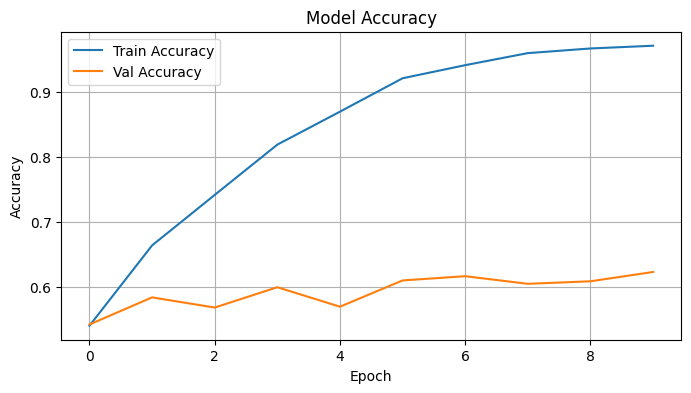

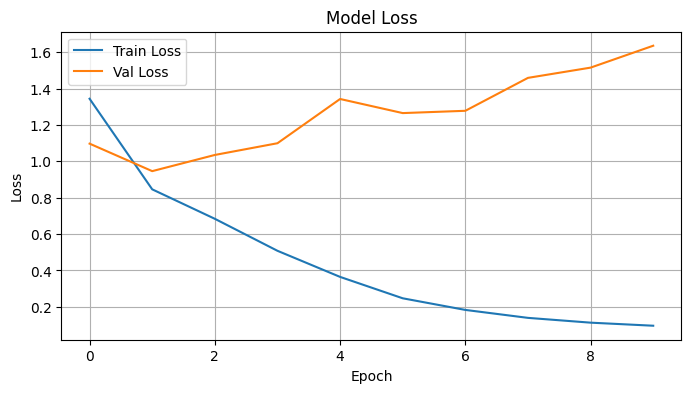

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Parameters
img_size = 150
batch_size = 32

# Data Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    'dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save the model
model.save('model/waste_model.h5')

# Evaluation
# Get predictions and true labels
val_data.reset()
pred_probs = model.predict(val_data, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(true_classes, pred_classes))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Final Accuracy and Loss
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"\nFinal Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc*100:.2f}%")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

# Plot Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
